In [1]:
# !pip install opendatasets

## **Download Dataset**

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import opendatasets as od

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras import losses, optimizers, metrics

In [3]:
od.download('https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight')

Skipping, found downloaded files in "./male-female-height-and-weight" (use force=True to force download)


## **Load Dataset**

In [4]:
data = pd.read_csv('male-female-height-and-weight/Test set.csv')
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [5]:
data.loc[data["Sex"]=="Male", "Sex"] = 1
data.loc[data["Sex"]=="Female", "Sex"] = 0

In [6]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


## **Split Data And Target**

In [7]:
x = data.drop(columns=["Sex"], axis=1)
y = data["Sex"]

In [8]:
y = y.astype("int")

## **Normalization**

In [9]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x = pd.DataFrame(x_scaled, columns=["Height", "Weight"])
x.head()

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


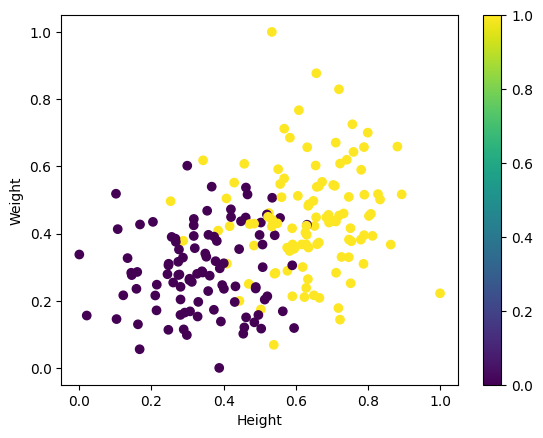

In [10]:
plt.scatter(x["Height"], x["Weight"], c=y)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.colorbar()
plt.show()

## **Split Train Test**

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Model Building**

In [12]:
model = Sequential()

model.add(Dense(64, activation="relu", input_shape=(2, )))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# compile
model.compile(loss=losses.binary_crossentropy,
              optimizer=optimizers.Adam(lr = 0.005),
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1249 (4.88 KB)
Trainable params: 1249 (4.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# train model
history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
6/6 [==============================] - 3s 162ms/step - loss: 0.6867 - accuracy: 0.5244 - val_loss: 0.6857 - val_accuracy: 0.4878
Epoch 2/200
6/6 [==============================] - 0s 19ms/step - loss: 0.6803 - accuracy: 0.5244 - val_loss: 0.6824 - val_accuracy: 0.4878
Epoch 3/200
6/6 [==============================] - 0s 23ms/step - loss: 0.6745 - accuracy: 0.5244 - val_loss: 0.6795 - val_accuracy: 0.4878
Epoch 4/200
6/6 [==============================] - 0s 15ms/step - loss: 0.6704 - accuracy: 0.5244 - val_loss: 0.6766 - val_accuracy: 0.4878
Epoch 5/200
6/6 [==============================] - 0s 21ms/step - loss: 0.6657 - accuracy: 0.5244 - val_loss: 0.6738 - val_accuracy: 0.4878
Epoch 6/200
6/6 [==============================] - 0s 14ms/step - loss: 0.6622 - accuracy: 0.5366 - val_loss: 0.6706 - val_accuracy: 0.4878
Epoch 7/200
6/6 [==============================] - 0s 13ms/step - loss: 0.6583 - accuracy: 0.5366 - val_loss: 0.6668 - val_accuracy: 0.5122
Epoch 8/200
6/6 [==

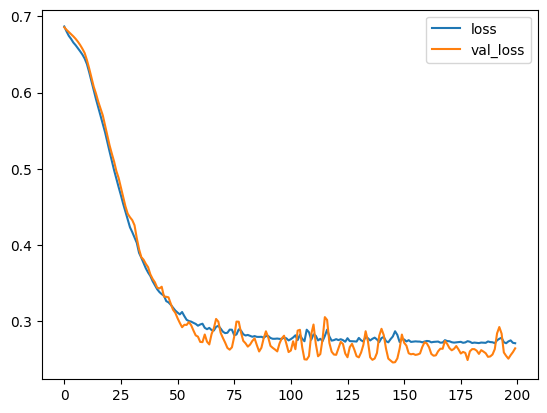

In [14]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

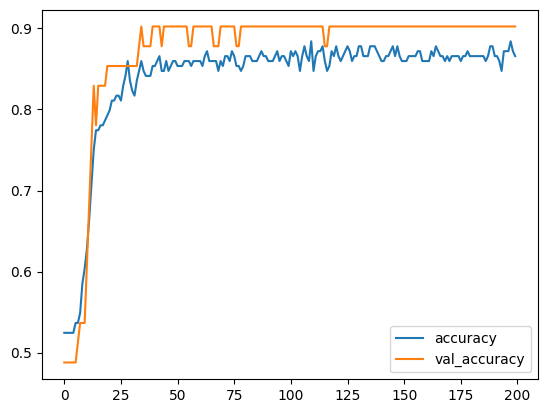

In [15]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

## **Model Evaluate**

In [16]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.2642 - accuracy: 0.9024


[0.26423826813697815, 0.9024389982223511]

## **Prediction**

In [22]:
y_pred = model.predict(x_test)

y_pred[:5]

2/2 [==============================] - 0s 4ms/step


array([[0.11599334],
       [0.9815382 ],
       [0.9926428 ],
       [0.22374073],
       [0.97948116]], dtype=float32)

In [24]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

### **Precision**

In [19]:
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8636364>

### **Recall**

In [20]:
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.95>